In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import glob
base_path = '/home/ashutosh/code/kaggle/RFSC_audio_detection/data'

In [9]:
!ls $base_path

sample_submission.csv  test  tfrecords	train  train_fp.csv  train_tp.csv


In [10]:
fpdf = pd.read_csv("data/train_fp.csv")
tpdf = pd.read_csv("data/train_tp.csv")

In [12]:
fpdf.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,00204008d,21,1,13.8400,3281.2500,14.9333,4125.0000
1,00204008d,8,1,24.4960,3750.0000,28.6187,5531.2500
2,00204008d,4,1,15.0027,2343.7500,16.8587,4218.7500
3,003b04435,22,1,43.2533,10687.5000,44.8587,13687.5000
4,003b04435,23,1,9.1254,7235.1562,15.2091,11283.3984


In [13]:
tpdf.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [15]:
foldsdf = pd.read_csv("train_folds.csv")

In [16]:
foldsdf.shape, foldsdf.recording_id.nunique()

((1216, 8), 1132)

In [17]:
tpdf.shape, tpdf.recording_id.nunique()

((1216, 7), 1132)

In [18]:
fpdf.shape, fpdf.recording_id.nunique()

((7781, 7), 3958)

In [20]:
fpdf.isna().sum(), tpdf.isna().sum()


(recording_id    0
 species_id      0
 songtype_id     0
 t_min           0
 f_min           0
 t_max           0
 f_max           0
 dtype: int64,
 recording_id    0
 species_id      0
 songtype_id     0
 t_min           0
 f_min           0
 t_max           0
 f_max           0
 dtype: int64)

In [38]:
fp_set = {}
tp_set = {}
for i in tpdf.iterrows():
    key = i[1]['recording_id']
    species = i[1]['species_id']
    if key not in tp_set:
        tp_set[key] = []
    tp_set[key].append(species)
    
    
for i in fpdf.iterrows():
    key = i[1]['recording_id']
    species = i[1]['species_id']
    if key not in fp_set:
        fp_set[key] = []
    fp_set[key].append(species)
    

In [39]:
tpdf[tpdf.recording_id == '03b96f209']

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
19,03b96f209,16,4,30.9333,3093.75,32.7680,4593.75
20,03b96f209,16,4,49.6320,3093.75,51.4667,4593.75


In [40]:
fpdf[fpdf.recording_id == '00834f88e']

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
16,00834f88e,15,1,13.5733,93.75,16.9173,1125.0
17,00834f88e,15,1,16.7040,93.75,20.0480,1125.0


In [34]:
max([len(tp_set[i]) for i in tp_set])

5

In [35]:
max([len(fp_set[i]) for i in fp_set])

10

number of samples per recording in training dataset

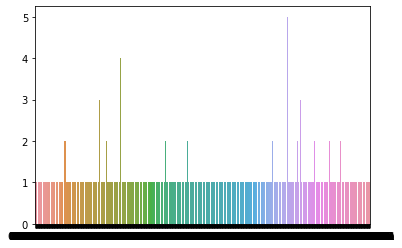

In [43]:
sns.barplot(x=[i for i in tp_set.keys()], y=[len(tp_set[i]) for i in tp_set.keys()])

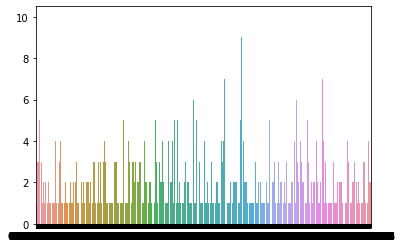

In [44]:
sns.barplot(x=[i for i in fp_set.keys()], y=[len(fp_set[i]) for i in fp_set.keys()])

number of species per recording in training dataset

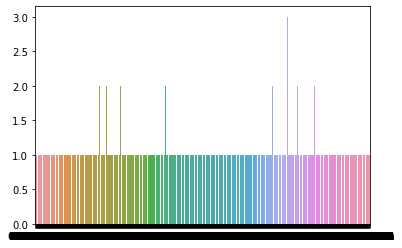

In [45]:
sns.barplot(x=[i for i in tp_set.keys()], y=[len(set(tp_set[i])) for i in tp_set.keys()])

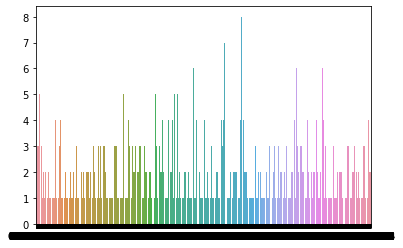

In [46]:
sns.barplot(x=[i for i in fp_set.keys()], y=[len(set(fp_set[i])) for i in fp_set.keys()])

Figuring out overlapping species in a both fp and tp for a particular recording id

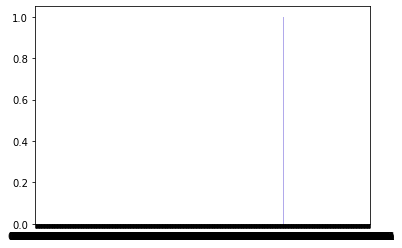

In [49]:
intersecting_species = []
for i in tp_set.keys():
    if i in fp_set:
        intersecting_species.append(len(set(tp_set[i]).intersection(set(fp_set[i]))))
    else:
        intersecting_species.append(0)
sns.barplot(x=[i for i in tp_set.keys()], y=intersecting_species)